# Tutorial I: Introduction to TensorFlow

<p>
Bern Winter School on Machine Learning, 28.01-01.02 2019<br>
Mykhailo Vladymyrov
</p>

This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

The main feature of TF is the way we define operations.
In regular programming we define a set of functions or methods on the objects.
In TF we define a computational graph. Computational graph is a directed graph in which every node corresponds to an operation or variable. Variables can feed their value into operations, and operations can feed their output into other operations.
Then, during execution we feed some data and/or parameters as input of the graph, and the graph produces the output.

## 00. Requirements

To run this notebooks you need Tensorflow and numpy installed.

Basic knowledge of Python can be acquired [here](https://docs.python.org/3/tutorial/) and of Numpy [here](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)

Full documentation on Tensorflow functions is available in the [reference](https://www.tensorflow.org/api_docs/python/). Sometimes [functions' implementation](https://github.com/tensorflow/tensorflow) might help to understand what is happening under the hood.

## 0. Cell execution

Press ``Ctrl+Enter`` or ``Shift+Enter`` on the next cell to execute the content

In [1]:
print('It works')

It works


Navigate between cells with arrows. Press `Enter` to edit cell, `Esc` to exit. Press `a` or `b` too create a new cell above or below.

## download libraries

In [2]:
! wget http://scits-training.unibe.ch/data/tut_files/t1.tgz
! tar -xvzf t1.tgz

--2019-01-29 09:48:29--  http://scits-training.unibe.ch/data/tut_files/t1.tgz
Resolving scits-training.unibe.ch (scits-training.unibe.ch)... 130.92.251.56
Connecting to scits-training.unibe.ch (scits-training.unibe.ch)|130.92.251.56|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2185 (2.1K) [application/octet-stream]
Saving to: ‘t1.tgz.2’

t1.tgz.2            100%[===================>]   2.13K  --.-KB/s    in 0s      

2019-01-29 09:48:30 (279 MB/s) - ‘t1.tgz.2’ saved [2185/2185]

utils/
utils/gr_disp.py
utils/inception.py
utils/__init__.py
tar: A lone zero block at 16


## 1. Load necessary libraries

In [3]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipyd
import tensorflow as tf

# We'll tell matplotlib to inline any drawn figures like so:
%matplotlib inline
plt.style.use('ggplot')
from utils import gr_disp

from IPython.core.display import HTML
HTML("""<style> .rendered_html code { 
    padding: 2px 5px;
    color: #0000aa;
    background-color: #cccccc;
} </style>""")

## 2. Create our first graph

First we need to define the input for the graph. The easiest way is to define so called ``placeholder``, where during the excecution we will feed in the input values.

In [0]:
input = tf.placeholder(name = 'input', shape=(), dtype=tf.float32)

Then we will define two simple operations. In most cases simple Python notation gives the desired result.

In [0]:
out1 = input + 5

In [0]:
out2 = input * out1

In [7]:
gr_disp.show(tf.get_default_graph().as_graph_def())

## 3. Run the graph

In [0]:
sess = tf.Session()

Session is used to compute the desired outputs, for example our defined ``out1``. 

In [0]:
#res1 = sess.run(out1)

If you will uncomment and run the above cell, you will get an error, indicating that the value for the ``input`` should be given. Here we will use feed dictionary, where we specify input as

In [10]:
res1 = sess.run(out1, feed_dict={input: 1})
print(res1)
#out1 = input+5 = 1+5 = 6

6.0


several values can be computed at the same time:

In [11]:
res1, res2 = sess.run((out1, out2), feed_dict={input: 3})
print(res1, res2)
#out1 = input+5 = 3+5 = 8
#out1 = (input+5)*input = (3+5)*3 = 8*3=24

8.0 24.0


<span style="color:red">*It is important to remember that in principle its better NOT TO USE ``feed_dict``: it is rather slow. 
There are several proper built-in mechanisms, that allow smooth data reading, in particular from disc (which is generally super slow!).*</span>

While in this course we will keep using ``feed_dict``, since it's more visual, and helps to better understand what is going on, you are highly encouradged to read and follow the official [guidelines](https://www.tensorflow.org/programmers_guide/datasets) related to the data streaming and handling.

MZ: NB: now we are using feed_dict because easier to understand, but not the best solution for big datasets



## 4. Tensor operations

For ML tasks we often need to perform operations on high-dimensional data. Theese are represented as tensors in TF. For example we can calculate sum of squared values in an 1D array with 5 elements:

In [0]:
tf.reset_default_graph()

# MZ: create array with 5 elements

input_arr = tf.placeholder(name='input_arr', dtype=tf.float32, shape=(5,))
squared = tf.multiply(input_arr, input_arr)
out_sum = tf.reduce_sum(squared)

# MZ:


In [17]:
np_arr = np.asarray((1,2,3,4,5), dtype=np.float32)
with tf.Session() as sess:
    print(sess.run(out_sum, feed_dict={input_arr: np_arr}))
# squared = (1,4,9,16,25)
# out_sum = 55

55.0


Or we can do the same for several 1D arrays at once:

In [44]:
tf.reset_default_graph()
input_arr = tf.placeholder(name='input_arr', dtype=tf.float32, shape=(None, 5)) #None stands for unknows length of the array
squared = tf.multiply(input_arr, input_arr)
out_sum = tf.reduce_sum(squared, axis=1) # sum only along 1st axis

# MZ:
# squared as not a value, Tensor object that specify what to do
#print(type(squared))


#Sample arrays of different size along first axis. 
#They all can be fed into the input_arr placeholder since along first axis size is unconstrained
np_arr1 = np.asarray([[1,2,3,4,5]], dtype=np.float32)
np_arr2 = np.asarray([[1,2,3,4,5], [2,3,4,5,6]], dtype=np.float32)
np_arr3 = np.asarray([[1,2,3,4,5], [2,3,4,5,6], [25,65,12,12,11], [1,2,3,4,5], [2,3,4,5,6], [25,65,12,12,11]], dtype=np.float32)
with tf.Session() as sess:
    print(sess.run(out_sum, feed_dict={input_arr: np_arr1}))
    print(sess.run(out_sum, feed_dict={input_arr: np_arr2}))
    print(sess.run(out_sum, feed_dict={input_arr: np_arr3}))
        

[55.]
[55. 90.]
[  55.   90. 5259.   55.   90. 5259.]


## 5. Excercise 1

Hint: You can use question mark to get description of function right from Jupyter notebook:

MZ: tells that tf.multiply supports broadcasting:
e.g. broadcast the constant to multiply each element of an array with a constant.
"broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations."

In [0]:
tf.multiply?




or ``Shift+Tab`` within the brackets to see function parameters (just ``Tab`` for google colab):

In [0]:
#tf.reduce_sum()

Modify the code bellow to calculate mean of array's elements.

In [47]:
#1. reset the graph
tf.reset_default_graph()


# MZ: define the placeholder, that can then take different input data values
input_arr = tf.placeholder(name='input_arr', shape=(None, None), dtype=tf.float32) #None stands for unknows length of the array

# 2.use reduce_mean to claculate mean along specified axes
out_mean = tf.reduce_mean(input_tensor=input_arr, axis = None)
# axis = None [or missing argument] # 1 value -> overall mean
# axis = 0: mean of (1,2,25), (2,3,65), ... # value for each column -> 5 values as output
# axis = 1: mean of (1,2,3,4,5) (2,3,4,5,6), (25,65,12,12,12,11) # value for each row -> 3 numbers

np_arr = np.asarray([[1,2,3,4,5], [2,3,4,5,6], [25,65,12,12,11]], dtype=np.float32)
with tf.Session() as sess:
  # 3. calculate the out_mean
  # res = ...   
  # MZ: 
  res = sess.run(out_mean, feed_dict={input_arr:np_arr})
  print(res)

#4. display the graph

gr_disp.show(tf.get_default_graph().as_graph_def())

10.666667


## 6. Optimization problem

In ML we always try to optimize model parameters to minimize a loss function. TF allows for easy optimization problem solving.
Let's see how this works. We will use a function $f$, parabolic with respect to the model parameter $t$: $f(x_1, x_2|t) = (x_1*t-x_2)^2$. Here $x_1$ and $x_2$ are given values for which we will try to minimize value of function $f$.

We define `t` as a variable using `get_variable` and initialize it with a constant 0. Variables are by default trainable, *i.e.* their value will be changed during training. 

MZ: image recognition: millions of parameters to optimize. Let's start with 1 single parameter.


Toy problem:
define a parabolic and find optimal parameter

In [0]:
tf.reset_default_graph()

t = tf.get_variable(name='t', dtype=tf.float32, shape=(), initializer=tf.constant_initializer(0))
# MZ: 
# t is the parameter for which we search the optimal value
# shape=() indicates that it is a scalar (not an array)
# we need an initial value; normally, random value is chosen, here we choose 0
x1 = tf.placeholder(name='x1', dtype=tf.float32, shape=())
x2 = tf.placeholder(name='x2', dtype=tf.float32, shape=())

In [0]:
#function to be minimized
# MZ:
# set the function to minimize - toy example here:
# we want to minimize the value of f
# t is the model parameter that we want to optimize
# minimize the value of a given function
# find the value of t so that the function has minimal value
f = tf.square(t*x1-x2)

Next we create and optimizer: object that on each iteration adjusts values of all trainable parameters (in our case just `t` to minimize the value of `f`. As the name sugests it uses steepest gradient descent.

MZ:

We want to optimize the value of t - but how to optimize ? We will use gradient descent.

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(f)
# MZ: set the optimizer that we want to use

Text(0.5, 1.0, 'f(itr)')

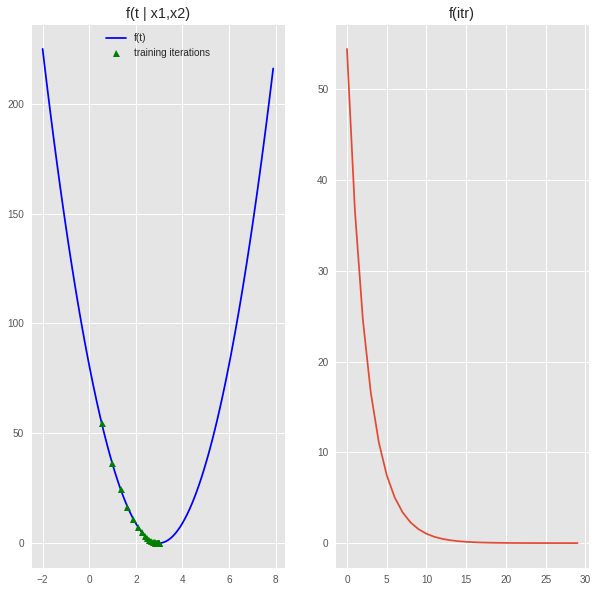

In [56]:
#values of x1, x2 for which we will minimize f
x1_val = 3.
x2_val = 9.

#buffers to store intermidiate values of t and f to plot them later.
t_sv = []
f_sv = []

with tf.Session() as sess:
    #don't forget to initialize all variables! 
    sess.run(tf.global_variables_initializer())
    
    #optimization works iteratively, adjusting the value of t on each step
    for itr in range (30):
        _ = sess.run(optimizer, feed_dict={x1:x1_val, x2:x2_val})
        
        # run optimize procedure
        # optimize all the parameters on which the function depends
        # parameters to optimize updated on each call of the optimizer
        
        f_val, t_val = sess.run([f, t], feed_dict={x1:x1_val, x2:x2_val})
        #save the current values of t and the function f
        t_sv.append(t_val)
        f_sv.append(f_val)
        


#just find the nice range for plotting
x0 = x2_val/x1_val
xhalf = max(abs(t_sv[0]-x0), 5.)
#fill array for parabola
t_all = np.arange(x0-xhalf, x0+xhalf, xhalf/50.)
f_all = np.asarray([(ti*x1_val-x2_val)*(ti*x1_val-x2_val) for ti in t_all])

#draw all
_, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].plot(t_all, f_all, 'b', t_sv, f_sv, 'g^')
axs[0].set_title('f(t | x1,x2)')
axs[0].legend(('f(t)', 'training iterations'),  loc='upper center')
axs[1].plot(f_sv)
axs[1].set_title('f(itr)')


we start at 0, then we descend the parabola until the minimum

## 7. Excercise 2

Try to modify ``x1_val`` and ``x2_val`` in the above code, as well as the ``learning_rate`` and ``t`` initialization value, and see how it affects convergence. Get an intuition on simple example, it is very useful!

Try to see when 
1. convergence is too slow 
2. oscillation near minimum occurs
3. divergence


MZ: during the exercises, will not modify x1_val and x2_val (time constraints), just by changing learning rate

In [0]:
x1_val = 3.
x2_val = 9.

[-2.00000000e+00 -1.90000000e+00 -1.80000000e+00 -1.70000000e+00
 -1.60000000e+00 -1.50000000e+00 -1.40000000e+00 -1.30000000e+00
 -1.20000000e+00 -1.10000000e+00 -1.00000000e+00 -9.00000000e-01
 -8.00000000e-01 -7.00000000e-01 -6.00000000e-01 -5.00000000e-01
 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01 -1.00000000e-01
  1.77635684e-15  1.00000000e-01  2.00000000e-01  3.00000000e-01
  4.00000000e-01  5.00000000e-01  6.00000000e-01  7.00000000e-01
  8.00000000e-01  9.00000000e-01  1.00000000e+00  1.10000000e+00
  1.20000000e+00  1.30000000e+00  1.40000000e+00  1.50000000e+00
  1.60000000e+00  1.70000000e+00  1.80000000e+00  1.90000000e+00
  2.00000000e+00  2.10000000e+00  2.20000000e+00  2.30000000e+00
  2.40000000e+00  2.50000000e+00  2.60000000e+00  2.70000000e+00
  2.80000000e+00  2.90000000e+00  3.00000000e+00  3.10000000e+00
  3.20000000e+00  3.30000000e+00  3.40000000e+00  3.50000000e+00
  3.60000000e+00  3.70000000e+00  3.80000000e+00  3.90000000e+00
  4.00000000e+00  4.10000

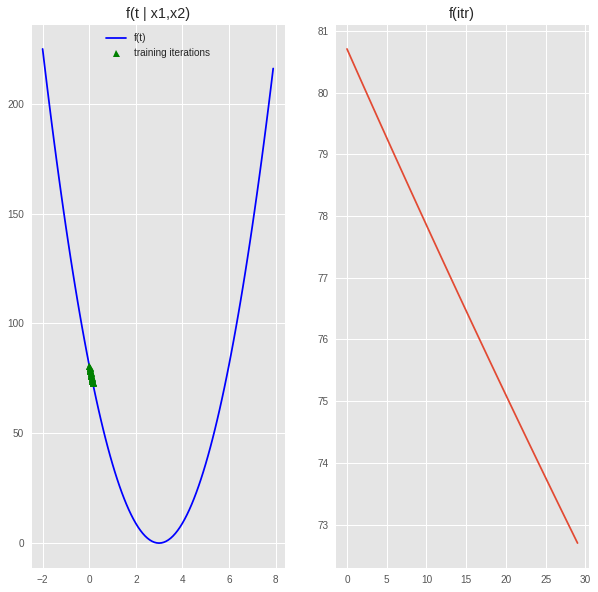

In [70]:
#_ assignment => avoid an output is printed
# bound of learning rate # depends on the function (10^-3 normal starting value; but need to try); should definitely be positive
# multiple parameters: updated all at once, gradient calculated with respect to each of them but updated at the same time
(you can virtually have different learning rate for different paramters, norma)

### 1) LOW CONVERGENCE: LEARNING RATE = 0.0001

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(f)

#buffers to store intermidiate values of t and f to plot them later.
t_sv = []
f_sv = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for itr in range (30):
        _ = sess.run(optimizer, feed_dict={x1:x1_val, x2:x2_val})
        f_val, t_val = sess.run([f, t], feed_dict={x1:x1_val, x2:x2_val})
        t_sv.append(t_val)
        f_sv.append(f_val)

#just find the nice range for plotting
x0 = x2_val/x1_val
xhalf = max(abs(t_sv[0]-x0), 5.)
#fill array for parabola
t_all = np.arange(x0-xhalf, x0+xhalf, xhalf/50.)
f_all = np.asarray([(ti*x1_val-x2_val)*(ti*x1_val-x2_val) for ti in t_all])

#draw all
_, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].plot(t_all, f_all, 'b', t_sv, f_sv, 'g^')
axs[0].set_title('f(t | x1,x2)')
axs[0].legend(('f(t)', 'training iterations'),  loc='upper center')
axs[1].plot(f_sv)
axs[1].set_title('f(itr)')

print(t_all)

[-4.80000019 -4.64400019 -4.48800018 -4.33200018 -4.17600018 -4.02000017
 -3.86400017 -3.70800016 -3.55200016 -3.39600016 -3.24000015 -3.08400015
 -2.92800014 -2.77200014 -2.61600014 -2.46000013 -2.30400013 -2.14800013
 -1.99200012 -1.83600012 -1.68000011 -1.52400011 -1.36800011 -1.2120001
 -1.0560001  -0.9000001  -0.74400009 -0.58800009 -0.43200008 -0.27600008
 -0.12000008  0.03599993  0.19199993  0.34799994  0.50399994  0.65999994
  0.81599995  0.97199995  1.12799995  1.28399996  1.43999996  1.59599997
  1.75199997  1.90799997  2.06399998  2.21999998  2.37599998  2.53199999
  2.68799999  2.844       3.          3.156       3.31200001  3.46800001
  3.62400002  3.78000002  3.93600002  4.09200003  4.24800003  4.40400003
  4.56000004  4.71600004  4.87200005  5.02800005  5.18400005  5.34000006
  5.49600006  5.65200006  5.80800007  5.96400007  6.12000008  6.27600008
  6.43200008  6.58800009  6.74400009  6.9000001   7.0560001   7.2120001
  7.36800011  7.52400011  7.68000011  7.83600012  7.9

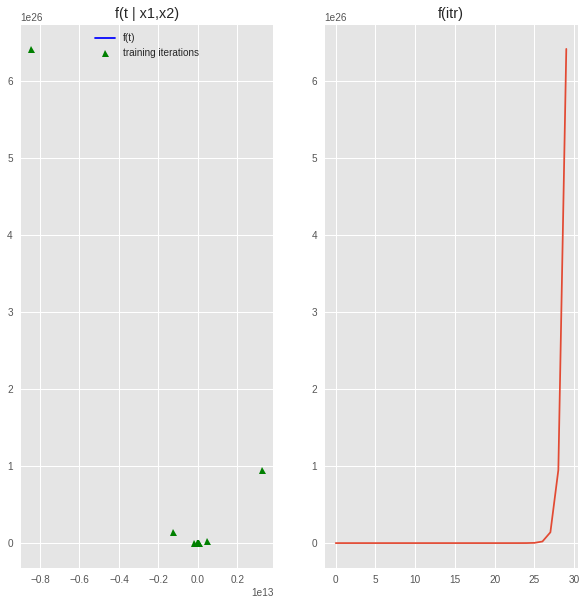

In [71]:
### 3) DIVERGENCE: LEARNING RATE = 0.2

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(f)

#buffers to store intermidiate values of t and f to plot them later.
t_sv = []
f_sv = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for itr in range (30):
        _ = sess.run(optimizer, feed_dict={x1:x1_val, x2:x2_val})
        f_val, t_val = sess.run([f, t], feed_dict={x1:x1_val, x2:x2_val})
        t_sv.append(t_val)
        f_sv.append(f_val)

#just find the nice range for plotting
x0 = x2_val/x1_val
xhalf = max(abs(t_sv[0]-x0), 5.)
#fill array for parabola
t_all = np.arange(x0-xhalf, x0+xhalf, xhalf/50.)
f_all = np.asarray([(ti*x1_val-x2_val)*(ti*x1_val-x2_val) for ti in t_all])

#draw all
_, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].plot(t_all, f_all, 'b', t_sv, f_sv, 'g^')
axs[0].set_title('f(t | x1,x2)')
axs[0].legend(('f(t)', 'training iterations'),  loc='upper center')
axs[1].plot(f_sv)
axs[1].set_title('f(itr)')

print(t_all)

[-4.40000000e+00 -4.30000000e+00 -4.20000000e+00 -4.10000000e+00
 -4.00000000e+00 -3.90000000e+00 -3.80000000e+00 -3.70000000e+00
 -3.60000000e+00 -3.50000000e+00 -3.40000000e+00 -3.30000000e+00
 -3.20000000e+00 -3.10000000e+00 -3.00000000e+00 -2.90000000e+00
 -2.80000000e+00 -2.70000000e+00 -2.60000000e+00 -2.50000000e+00
 -2.40000000e+00 -2.30000000e+00 -2.20000000e+00 -2.10000000e+00
 -2.00000000e+00 -1.90000000e+00 -1.80000000e+00 -1.70000000e+00
 -1.60000000e+00 -1.50000000e+00 -1.40000000e+00 -1.30000000e+00
 -1.20000000e+00 -1.10000000e+00 -1.00000000e+00 -9.00000000e-01
 -8.00000000e-01 -7.00000000e-01 -6.00000000e-01 -5.00000000e-01
 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01 -1.00000000e-01
 -1.59872116e-14  1.00000000e-01  2.00000000e-01  3.00000000e-01
  4.00000000e-01  5.00000000e-01  6.00000000e-01  7.00000000e-01
  8.00000000e-01  9.00000000e-01  1.00000000e+00  1.10000000e+00
  1.20000000e+00  1.30000000e+00  1.40000000e+00  1.50000000e+00
  1.60000000e+00  1.70000

Text(0.5, 1.0, 'f(itr)')

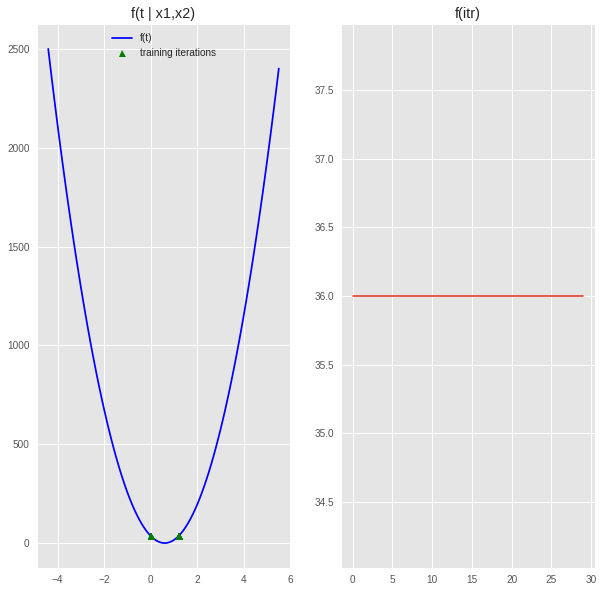

In [80]:
### 2) OSCILLATION: LEARNING RATE = 0.1

# with 0.01, 10 and 6

x1_val = 10.
x2_val = 6.

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(f)

#buffers to store intermidiate values of t and f to plot them later.
t_sv = []
f_sv = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for itr in range (30):
        _ = sess.run(optimizer, feed_dict={x1:x1_val, x2:x2_val})
        f_val, t_val = sess.run([f, t], feed_dict={x1:x1_val, x2:x2_val})
        t_sv.append(t_val)
        f_sv.append(f_val)

#just find the nice range for plotting
x0 = x2_val/x1_val
xhalf = max(abs(t_sv[0]-x0), 5.)
#fill array for parabola
t_all = np.arange(x0-xhalf, x0+xhalf, xhalf/50.)
f_all = np.asarray([(ti*x1_val-x2_val)*(ti*x1_val-x2_val) for ti in t_all])

print(t_all)

#draw all
_, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].plot(t_all, f_all, 'b', t_sv, f_sv, 'g^')
axs[0].set_title('f(t | x1,x2)')
axs[0].legend(('f(t)', 'training iterations'),  loc='upper center')
axs[1].plot(f_sv)
axs[1].set_title('f(itr)')
